In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# $\star$ Question 2: 
Estimate the mean and covariance matrix of the dataset *data.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues. Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

# Question 2.1: Mean and Covariance estimation 
Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.

In [57]:
data = np.load('/home/rean/spr_ex/spr-exercises/data/data.npz')['arr_0']
N = np.size(data,axis = 0)
mean_nofunc = (np.sum(data,axis = 0))/N
cov_nofunc = np.matmul((data-mean_nofunc).T,(data-mean_nofunc))/N
mean_func = np.mean(data,axis = 0)
cov_func = np.cov(data.T)

In [51]:
cov_nofunc

array([[1.33765954, 2.0820358 ],
       [2.0820358 , 3.98639368]])


cov

In [56]:
mean_nofunc

array([2.12308534, 3.12168402])

In [58]:
cov_func

array([[1.35117126, 2.10306646],
       [2.10306646, 4.02666029]])

In [60]:
np.linalg.eig(cov_func)


(array([0.1964373 , 5.18139424]),
 array([[-0.87655934, -0.48129379],
        [ 0.48129379, -0.87655934]]))

# Question 2.2: Plotting the graph
Plot the points and indicate the mean via a cross and the covariance via an
ellipse

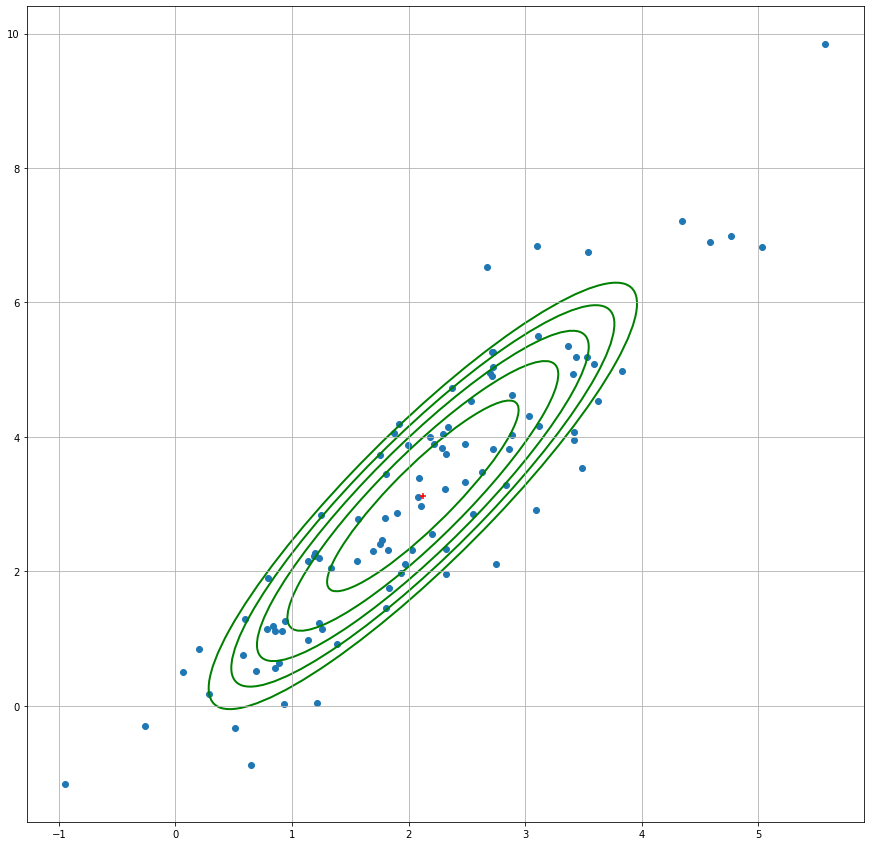

In [65]:
def plot_confidence_ellipse(data,mean,cov):
    eig_w,eig_v = np.linalg.eig(cov)
    fig,ax = plt.subplots(figsize = (15,15))

    for i in range(5):
        ellipse = Ellipse( xy = mean_func, width =np.sqrt(eig_w[0]*2*(i+1)),height = np.sqrt(eig_w[1]*2*(1+i)),angle = np.rad2deg(np.arccos(eig_v[0,0])),edgecolor = 'green', lw = 2, facecolor = 'none' )
        ax.add_artist(ellipse)
    
    plt.scatter(data[:,0],data[:,1])
    plt.scatter(mean_func[0],mean_func[1],marker = '+',c = 'red')
    plt.grid()
    plt.show()

plot_confidence_ellipse(data,mean_func,cov_func)                            
        


# $\star\star$ Question 3:
Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come
in.

# Question 3.1: Using the correct prior
Using   $\mu_0 = (2,3)^T $



In [88]:
def estimator(data,reduction_size, cov, prior_mean):
    data_red = data[0:reduction_size]
    prior_cov = cov
    ml_mean_data_red = np.mean(data_red,axis = 0)

    cov_red = np.linalg.inv(np.linalg.inv(prior_cov)+reduction_size*np.linalg.inv(cov))
    map_mean_red = cov_red@(reduction_size*np.linalg.inv(cov)@ml_mean_data_red+ np.linalg.inv(prior_cov)@prior_mean)

    print(f"MAP estimate for {reduction_size} data points is {map_mean_red}")
    return map_mean_red,ml_mean_data_red


In [86]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
def get_color(i):
    return color_cycle[i % len(color_cycle)]

MAP estimate for 2 data points is [2.79051738 4.17201882]
MAP estimate for 5 data points is [2.21560731 3.29619296]
MAP estimate for 10 data points is [2.56752927 4.00546172]


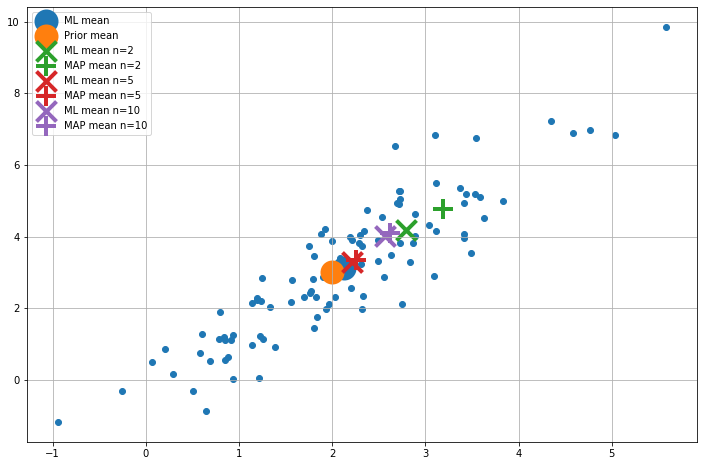

In [87]:
def plotter(data,reduction_sizes,prior_mean,ml_mean):
    plt.figure(figsize=(12, 8))
    plt.scatter(data[:, 0], data[:, 1])
    plt.scatter(ml_mean[0], ml_mean[1], label=f"ML mean", c=get_color(0), marker="o", s=400, lw=4)
    plt.scatter(prior_mean[0], prior_mean[1], label=f"Prior mean", c=get_color(1), marker="o", s=400, lw=4)
    for i, n in enumerate(reduction_sizes):
        ml_mean, map_mean = estimator(data, n, cov_func, prior_mean)
        plt.scatter(ml_mean[0], ml_mean[1], label=f"ML mean n={n}", c=get_color(i+2), 
                    marker="x", s=400, lw=4)
        plt.scatter(map_mean[0], map_mean[1], label=f"MAP mean n={n}", c=get_color(i+2), 
                    marker="+", s=400, lw=4)
    plt.legend()
    plt.grid()
    plt.show()

prior_mean = np.array([2, 3])
plotter(data, [2, 5, 10], prior_mean, mean_func)

# Question 3.2: Using a slightly wrong prior
Using $\mu_0 = (2,5)^T $

MAP estimate for 2 data points is [2.79051738 4.83868548]
MAP estimate for 5 data points is [2.21560731 3.62952629]
MAP estimate for 10 data points is [2.56752927 4.1872799 ]


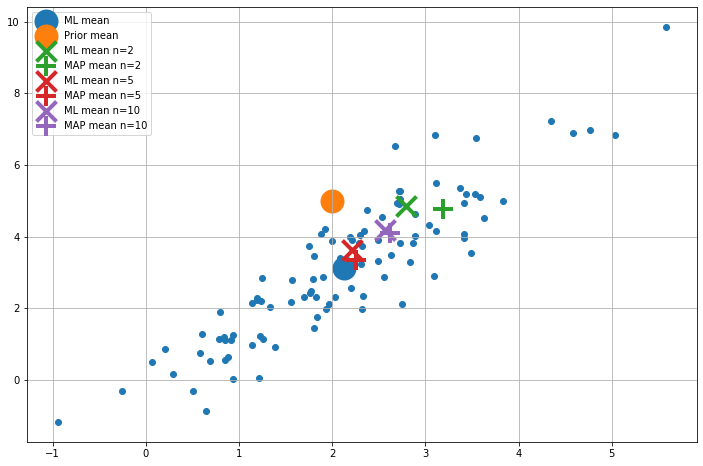

In [89]:
prior_mean = np.array([2,5])
plotter(data,[2,5,10],prior_mean,mean_func)

# $\star$ Question 4:
Estimate mean and covariance of the dataset *dataplus.npz* using ML and show
the result. How well does the estimate reflect the true data?

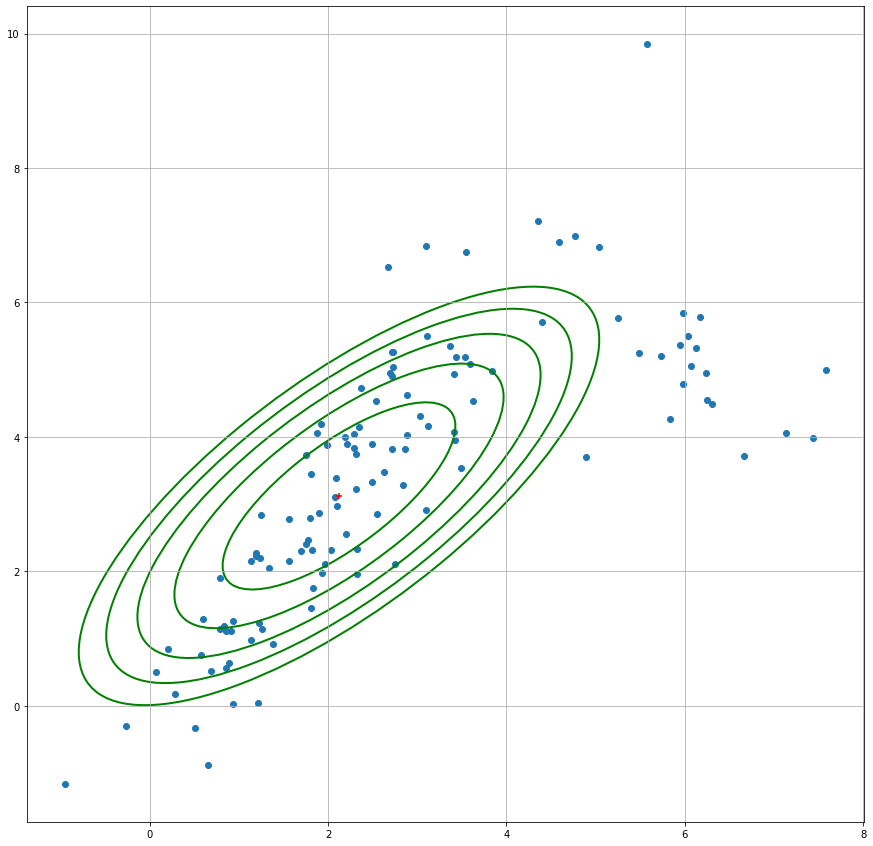

In [91]:
data_gaussian = np.load('/home/rean/spr_ex/spr-exercises/data/gaussianplus.npz')['arr_0']
mean_plus = np.mean(data_gaussian,axis = 0)
cov_plus = np.cov(data_gaussian.T)

plot_confidence_ellipse(data_gaussian, mean_plus,cov_plus)